# Binomial Pricing model and Black-Scholes Model

https://www.investopedia.com/terms/b/binomialoptionpricing.asp<br/>
https://www.investopedia.com/terms/b/blackscholes.asp

## Importing important libraries

In [199]:
!pip install yfinance

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import date
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

# to fetch data 
import yfinance as yf

import scipy.stats as ss
import math

## Importing data

In [201]:
symbol = 'AAPL'
end = date.today()
start = end.replace(year = 2020)


# Read data 
df = yf.download(symbol,start,end)

df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-28,133.410004,135.250000,133.350006,134.779999,134.779999,62111300
2021-06-29,134.800003,136.490005,134.350006,136.330002,136.330002,64556100
2021-06-30,136.169998,137.410004,135.869995,136.960007,136.960007,63261400
2021-07-01,136.600006,137.330002,135.759995,137.270004,137.270004,52485800
2021-07-02,137.899994,140.000000,137.750000,139.960007,139.960007,78852600


In [202]:
df.shape

(252, 6)

In [203]:
symbol = 'AAPL'  #the ticker of the stock whose data is to be taken out
dfo = yf.Ticker(symbol)

In [204]:
dfo.options  #to get the date of different expiration time

('2021-07-09',
 '2021-07-16',
 '2021-07-23',
 '2021-07-30',
 '2021-08-06',
 '2021-08-13',
 '2021-08-20',
 '2021-09-17',
 '2021-10-15',
 '2021-11-19',
 '2021-12-17',
 '2022-01-21',
 '2022-06-17',
 '2022-09-16',
 '2023-01-20',
 '2023-03-17',
 '2023-06-16')

In [205]:
dfo_exp = dfo.option_chain(dfo.options[1])  #you can change index to try on different expiry dates

In [206]:
dfo_exp.calls.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL210716C00022500,2021-07-02 14:18:04,22.5,116.35,0.00,0.0,0.0,0.0,6.0,0,0.000010,True,REGULAR,USD
1,AAPL210716C00025000,2021-06-25 19:12:10,25.0,108.04,114.85,115.0,0.0,0.0,150.0,22,3.687501,True,REGULAR,USD
2,AAPL210716C00030000,2021-06-18 15:15:40,30.0,100.60,109.85,110.0,0.0,0.0,13.0,15,3.296877,True,REGULAR,USD
3,AAPL210716C00035000,2021-06-18 15:15:40,35.0,95.60,104.85,105.0,0.0,0.0,12.0,49,2.984378,True,REGULAR,USD
4,AAPL210716C00040000,2021-07-02 16:57:06,40.0,99.56,0.00,0.0,0.0,0.0,5.0,0,0.000010,True,REGULAR,USD


## Calculation of u and d

u
 =size of the up move factor=
$e^{σ\sqrt{t}}$
, and

d
=size of the down move factor=
$e^{−σ\sqrt{t}}$
=
$1/e^{σ\sqrt{t}}$
=
1/
u


σ
  is the annual volatility of the underlying asset’s returns and 
t
 is the length of the step in the binomial model.

To calculate annual volatility:-<br/>
First calculate the daily returns of the asset<br/>
Then calculate its standard deviation<br/>
Then multiply it by sqrt(252) as in a year there are 252 trading days.

In [207]:
#Calculation of daily returns
#Hint : You can use pct_change on daily closing which you can get from df
ret = ((-df.Open+df.Close)/df.Open)*100

In [208]:
#Remove nan if any
ret.head()

Date
2020-07-06    1.040542
2020-07-07   -0.724541
2020-07-08    1.234337
2020-07-09   -0.529796
2020-07-10    0.613625
dtype: float64

In [209]:
#Calculation of daily standard deviation
daily_vol =ret.std()

In [210]:
daily_vol   

1.6643567561135715

In [211]:
#Calculate annual volatility from daily volatility
vol = daily_vol*np.sqrt(252)

In [212]:
vol 

26.420844417400147

In [213]:
dfo.options[1]

'2021-07-16'

In [214]:
date.today()

datetime.date(2021, 7, 6)

In [215]:
N = 100

#Calculate the number of days left for expiry from your calculation in years


year=int(dfo.options[1][0:4])
month=int(dfo.options[1][5:7])
day=int(dfo.options[1][8:])
f_date=date.today()
l_date=date(year,month,day)
T=(l_date - f_date).days
t = T/N          

In [216]:
u =  math.exp(vol*np.sqrt(t))    #Calculate u from the above formula
u              

4251.404195937742

In [217]:
d = 1/u  #Similarly calculate d
d

0.00023521640237254076

## Binomial Pricing model for call option

Let S denote the price of the stock today, and let T denote the time until expiry of the option, in years. We'll divide this period into N equal time intervals, of length ΔT=T/N Assume that in each time period, the stock price changes by either multiplying by u, which we consider as an up movement, or by d, the down movement. We need to assume d<erΔT<u, where r is the risk-free interest rate, to avoid the possibility of arbitrage. If k time periods have passed, m is number if up movement : S(k,m)=S * u ** m * d ** (k-m)

C(N,m)=max(S(N,m)−K,0)

Once we know the value of the option at the end of the tree, we can work backward as before to figure out the value of the option at every node. Let C(k,m) denote the value of the option at the node that is k steps into the tree with m up movements in the stock price. The two following nodes in the tree are C(k+1,m+1) (if the price moves up) and C(k+1,m) (if the price moves down). If we let p denote the risk-neutral probability

p = (e**(rΔT)−d)/(u−d)

of a movement up, then the expected value of the option in the next step is
pC(k+1,m+1)+(1−p)C(k+1,m)

and so the value of the option at C(k,m) is the above expected value, discounted to today using the risk-free interest rate. That is

C(k,m)=e−rΔT(pC(k+1,m+1)+(1−p)C(k+1,m))

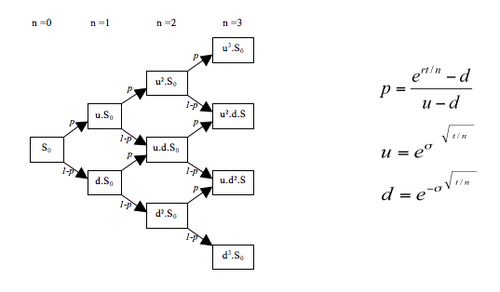

In [218]:
def first_binomial_call(S, K, T, r, u, d, N):
    """
    Implementation of binomial pricing model
    
    Parameters
    ----------
    S : float
        stock price
        
    K : float
        strike price
        
    T : float
        expiry time in years
        
    r : float
        risk free rate which could be taken out of the yield of US treasury bonds
        
    u : float
        size of upfactor move
        
    d : float
        size of downfactor move
        
    N : int
        number of steps in binomial model
        
    Returns
    -------
    C : dict
        the binary pricing model in the form of dictionary
    """
    
    dt = t   #the time interval in years
    p = (math.exp(r*t/n)-d)/(u-d)   #risk neutral probability
    C = {}
    
    #last column of the model (payoff of call)
    for m in range(1, N+1):
            C[(N, m)] =max((S(N,m))-k,0)
            
    #moving backwards to calculate the call price
    for k in range(N-1, 0, -1):
        for m in range(1,k+1):
            C[(k, m)] = math.exp(-r*t)*(p*C(k+1,m+1)+(1-p)*C(k+1,m))
    return C

In [219]:
#r is the risk free rate taken from the 10 years us treasury bond
call = {}
for K in dfo_exp.calls['strike']:
    call_price = first_binomial_call(S = df['Close'][len(df)-1], K = K, T = T, r=0.0152*t, u = u, d =d, N=N)[(1, 1)]
  # print(call_price)
    call[K] = call_price
th_call = pd.DataFrame.from_dict(call, orient='index')
th_call.rename(columns = {0:"th_call"}, inplace = True)
th_call.head()

NameError: name 'n' is not defined

In [220]:
ac_call = dfo_exp.calls.loc[:, ['strike', 'lastPrice']]
ac_call.set_index('strike', inplace = True)
ac_call.rename(columns = {"lastPrice":"ac_call"}, inplace=True)
ac_call.head()

,ac_call
strike,
22.5,116.35
25.0,108.04
30.0,100.60
35.0,95.60
40.0,99.56


In [221]:
call = th_call
call["ac_call"] = ac_call
call.head(10)

ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

In [222]:
call.plot()

TypeError: no numeric data to plot

## Black-Scholes Model

\begin{equation*}
C=SN(d1)−Ke^{−rt}N(d2)\\
P=Ke^{−rt}N(-d2)-SN(-d1)
\end{equation*}

\begin{equation*}
d1 = (ln(S/K) + (r+σ^2/2)t)/σ\sqrt{t}\\
d2 = d1 - σ\sqrt{t}
\end{equation*}

C : call option price<br/>
P : Put option price<br/>
S : Stock price<br/>
K : Strike price<br/>
r : risk free rate<br/>
t : time of maturity in year<br/>
N = Normal distribution

In [223]:
def euro_vanilla(S, K, T, r, sigma, option = 'call'):
    """
    To calculate options price with the help of black-scholes model
    
    Parameters
    ----------
    S : float
        The price of the underlying
    
    K : float
        Strike price of the option
        
    T : float
        Time to expiry in years
        
    r : float
        Risk free rate which can be taken as the US Treasury bond yield
        
    sigma : float
        The annual volatility of the returns
        
    option : string
        call for call option
        put for put option
    
    Returns
    -------
    premium : float
        The price of call or put option
    
    Hint
    ----
    You can use norm.cdf function of scipy.stats
    to convert d1 into normal distribution.
    """
    
    
    d1 = (math.log(S/K))+((r+(vol*vol)/2)*t)/vol*np.sqrt(t)
    d2 = d1-vol*np.sqrt(t)
    
    if option == 'call':
        premium = S-K
    if option == 'put':
        premium =  K-S
        
    return premium

In [224]:
#r is the risk free rate taken from the 10 years us treasury bond
#Calculate call for each strike price as calculated for binomial pricing model
call = {}




th_call = pd.DataFrame.from_dict(call, orient='index')
th_call.rename(columns = {0:"th_call"}, inplace = True)
th_call.head()

""


In [225]:
call = th_call
call["ac_call"] = ac_call
call.head(10)

ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

In [226]:
call.plot()

TypeError: no numeric data to plot

In [227]:
#r is the risk free rate taken from the 10 years us treasury bond
#Similarly calculate for put options
put = {}





th_put = pd.DataFrame.from_dict(put, orient='index')
th_put.rename(columns = {0:"th_put"}, inplace = True)
th_put.head()

""


In [228]:
ac_put = dfo_exp.puts.loc[:, ['strike', 'lastPrice']]
ac_put.set_index('strike', inplace = True)
ac_put.rename(columns = {"lastPrice":"ac_put"}, inplace=True)
ac_put.head()

,ac_put
strike,
22.5,0.01
25.0,0.01
30.0,0.01
35.0,0.01
40.0,0.02


In [229]:
put = th_put
put["ac_put"] = ac_put
put.tail(10)

ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

In [230]:
put.plot()

TypeError: no numeric data to plot

## Put-call Parity

\begin{equation*}
C + PV(K) = P + S
\end{equation*}

C = price of the European call option <br/>
PV(K) = the present value of the strike price (K), discounted from the value on the expiration date at the risk-free rate <br/>
P = price of the European put<br/>
S = spot price or the current market value of the underlying asset

In [32]:
data = pd.concat([call, put], axis=1)

In [33]:
data

,th_call,ac_call,th_put,ac_put
65.0,6.515000e+01,65.75,4.968817e-48,0.02
70.0,6.015000e+01,60.96,8.874966e-39,0.02
75.0,5.515000e+01,52.01,4.423996e-31,0.01
80.0,5.015000e+01,48.81,1.120772e-24,0.01
85.0,4.515000e+01,45.60,2.321748e-19,0.02
90.0,4.015000e+01,37.33,5.768608e-15,0.01
95.0,3.515000e+01,30.97,2.350824e-11,0.01
100.0,3.015000e+01,30.42,2.036820e-08,0.01
104.0,NaN,NaN,1.734852e-06,0.01
105.0,2.515000e+01,25.40,4.668544e-06,0.01


In [34]:
data.dropna(inplace = True)

In [35]:
data.head()

,th_call,ac_call,th_put,ac_put
65.0,65.149998,65.75,4.968817e-48,0.02
70.0,60.149998,60.96,8.874966e-39,0.02
75.0,55.149998,52.01,4.423996e-31,0.01
80.0,50.149999,48.81,1.120772e-24,0.01
85.0,45.149999,45.60,2.321748e-19,0.02


In [36]:
data["PV(K)"] = data.index

In [37]:
data["PV(K)"] = data["PV(K)"]*np.exp(-0.0152*t)

In [38]:
data["Spot Price"] = df["Close"][len(df)-1]

In [39]:
data.head()

,th_call,ac_call,th_put,ac_put,PV(K),Spot Price
65.0,65.149998,65.75,4.968817e-48,0.02,64.999803,130.149994
70.0,60.149998,60.96,8.874966e-39,0.02,69.999788,130.149994
75.0,55.149998,52.01,4.423996e-31,0.01,74.999773,130.149994
80.0,50.149999,48.81,1.120772e-24,0.01,79.999758,130.149994
85.0,45.149999,45.60,2.321748e-19,0.02,84.999742,130.149994


In [40]:
put_call_parity = _________   #Calculate put call parity fortheoretical prices

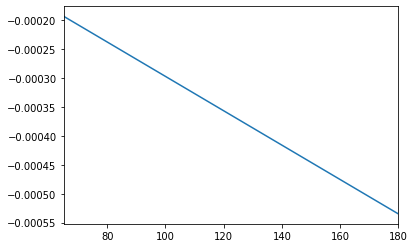

In [41]:
put_call_parity.plot()

In [42]:
put_call_parity =  ________  #Calculate put call parity for actual prices

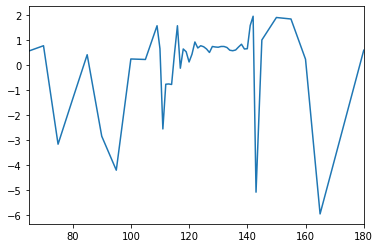

In [43]:
put_call_parity.plot()

The put-call parity in the actual market may not hold good because of the difference in supply and demand thus opening up the arbitrage opportunity for the traders. But this oppportunity is for very low time and mostly occurs in less volume options, i.e., deep in the money or deep out of money options.

## Calculate Delta of At The Money Call option using Black Scholes Model

In [ ]:
# write your code here